In [ ]:
from nbodykit.lab import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
halos1 = BigFileCatalog('Halos_paired2_reconvr.bigfile')
halos2 = BigFileCatalog('Halos_paired2_reconvr.bigfile')

/home/pcontreras/anaconda3/lib/python3.8/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


In [ ]:
mask = halos1['Position'][:,0] < 50.

In [ ]:
(halos1['Position'][mask, 0] + 50.).compute()

array([63.130615, 55.204693, 71.10064 , ..., 96.18752 , 99.00621 ,
       93.672745], dtype=float32)

In [ ]:
linear = BigFileMesh('Initialrealization.bigfile', dataset='Field')
r = FFTPower(linear, mode="1d")
Pkdelta = r.power['power'].real
k_array = r.power['k']

In [ ]:
deltapre1 = halos1.to_mesh(position='PositionRSD', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapre1, mode="1d")
Pkpre1 = r.power['power'].real - r.power.attrs['shotnoise']
deltapreR1 = halos1.to_mesh(position='Position', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapreR1, mode="1d")
PkpreR1 = r.power['power'].real - r.power.attrs['shotnoise']
pdfpre1 = deltapre1.apply(filters.Gaussian(r=15).filter, mode='complex', kind='wavenumber').paint(mode='real')
deltapost1 = halos1.to_mesh(position='PositionQS', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapost1, mode="1d")
Pkpost1 = r.power['power'].real - r.power.attrs['shotnoise']
deltapostR1 = halos1.to_mesh(position='PositionQ', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapostR1, mode="1d")
PkpostR1 = r.power['power'].real - r.power.attrs['shotnoise']
pdfpost1 = deltapost1.apply(filters.Gaussian(r=15).filter, mode='complex', kind='wavenumber').paint(mode='real')

deltapre2 = halos2.to_mesh(position='PositionRSD', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapre2, mode="1d")
Pkpre2 = r.power['power'].real - r.power.attrs['shotnoise']
deltapreR2 = halos2.to_mesh(position='Position', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapreR2, mode="1d")
PkpreR2 = r.power['power'].real - r.power.attrs['shotnoise']
pdfpre2 = deltapre2.apply(filters.Gaussian(r=15).filter, mode='complex', kind='wavenumber').paint(mode='real')
deltapost2 = halos2.to_mesh(position='PositionQS', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapost2, mode="1d")
Pkpost2 = r.power['power'].real - r.power.attrs['shotnoise']
deltapostR2 = halos2.to_mesh(position='PositionQ', interlaced=True, resampler='cic', compensated=True)
r = FFTPower(deltapostR2, mode="1d")
PkpostR2 = r.power['power'].real - r.power.attrs['shotnoise']
pdfpost2 = deltapost2.apply(filters.Gaussian(r=15).filter, mode='complex', kind='wavenumber').paint(mode='real')

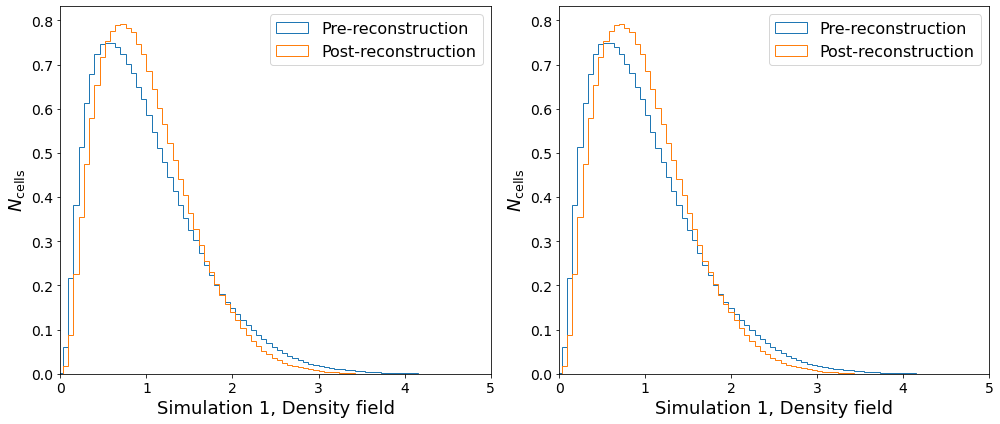

In [ ]:
bins = numpy.linspace(-1, 5, 100)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].hist(pdfpre1.value.flatten(), bins=bins, density=True, histtype='step', label='Pre-reconstruction')
ax[0].hist(pdfpost1.value.flatten(), bins=bins, density=True, histtype='step', label='Post-reconstruction')
ax[0].legend(fontsize='16')
ax[0].set_xlabel(r"Simulation 1, Density field", fontsize='18')
ax[0].set_ylabel(r"$N_\mathrm{cells}$", fontsize='18')
ax[0].set(xlim=(0,5))
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].hist(pdfpre2.value.flatten(), bins=bins, density=True, histtype='step', label='Pre-reconstruction')
ax[1].hist(pdfpost2.value.flatten(), bins=bins, density=True, histtype='step', label='Post-reconstruction')
ax[1].legend(fontsize='16')
ax[1].set_xlabel(r"Simulation 1, Density field", fontsize='18')
ax[1].set_ylabel(r"$N_\mathrm{cells}$", fontsize='18')
ax[1].set(xlim=(0,5))
ax[1].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('histograms.pdf')

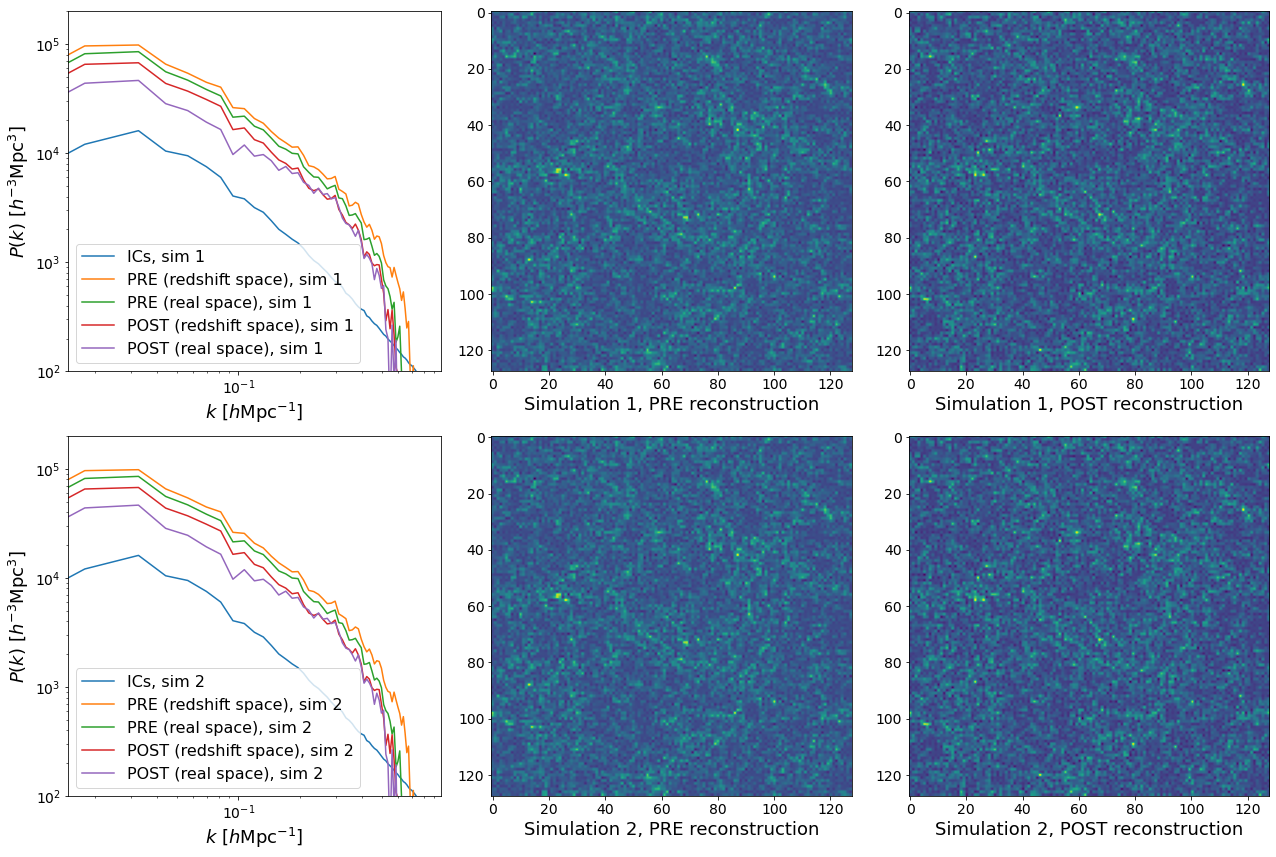

In [ ]:
# Compare densifty field in physical and redshift space
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0,0].loglog(k_array, Pkdelta, label='ICs, sim 1')
ax[0,0].loglog(k_array, Pkpre1, label='PRE (redshift space), sim 1')
ax[0,0].loglog(k_array, PkpreR1, label='PRE (real space), sim 1')
ax[0,0].loglog(k_array, Pkpost1, label='POST (redshift space), sim 1')
ax[0,0].loglog(k_array, PkpostR1, label='POST (real space), sim 1')
ax[0,0].legend(fontsize='16')
ax[0,0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[0,0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$', fontsize='18')
ax[0,0].set(ylim=(1e2, 2e5))
ax[0,0].tick_params(axis='both', which='major', labelsize=14)

ax[0,1].imshow(deltapre1.paint(mode='real').preview(axes=[0,1]))
ax[0,1].set_xlabel('Simulation 1, PRE reconstruction', fontsize='18')#r'$1 + \delta_{g}$')
ax[0,1].tick_params(axis='both', which='major', labelsize=14)

ax[0,2].imshow(deltapost1.paint(mode='real').preview(axes=[0,1]))
ax[0,2].set_xlabel('Simulation 1, POST reconstruction', fontsize='18')#r'$1 + \delta_{g}^{s}$')
ax[0,2].tick_params(axis='both', which='major', labelsize=14)

ax[1,0].loglog(k_array, Pkdelta, label='ICs, sim 2')
ax[1,0].loglog(k_array, Pkpre2, label='PRE (redshift space), sim 2')
ax[1,0].loglog(k_array, PkpreR2, label='PRE (real space), sim 2')
ax[1,0].loglog(k_array, Pkpost2, label='POST (redshift space), sim 2')
ax[1,0].loglog(k_array, PkpostR2, label='POST (real space), sim 2')
ax[1,0].legend(fontsize='16')
ax[1,0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[1,0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$', fontsize='18')
ax[1,0].set(ylim=(1e2, 2e5))
ax[1,0].tick_params(axis='both', which='major', labelsize=14)

ax[1,1].imshow(deltapre2.paint(mode='real').preview(axes=[0,1]))
ax[1,1].set_xlabel('Simulation 2, PRE reconstruction', fontsize='18')#r'$1 + \delta_{g}$')
ax[1,1].tick_params(axis='both', which='major', labelsize=14)

ax[1,2].imshow(deltapost2.paint(mode='real').preview(axes=[0,1]))
ax[1,2].set_xlabel('Simulation 2, POST reconstruction', fontsize='18')#r'$1 + \delta_{g}^{s}$')
ax[1,2].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('plots_reconstruction.pdf')